# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [61]:
df = pd.read_csv("dataframe_com_dummies.csv", index_col=0)

df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
2,0,1,1,0,46.224658,2.106849,1,1,1,1,...,True,False,False,False,False,True,False,False,False,False
3,1,1,0,0,29.230137,3.021918,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
4,1,0,1,0,27.482192,4.024658,1,0,1,0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,1,0,1,1,34.857534,3.101370,1,1,1,0,...,False,False,True,False,False,True,False,False,False,False
6766,1,0,1,0,54.109589,9.884932,1,0,0,0,...,False,False,False,False,False,True,False,False,False,False
6767,1,0,1,0,43.389041,7.380822,1,1,1,0,...,True,False,False,False,False,True,False,False,False,False
6768,0,1,1,0,30.005479,9.800000,1,1,0,0,...,True,False,False,False,False,True,False,False,False,False


In [54]:
df.mau.value_counts()

mau
False    6472
True      298
Name: count, dtype: int64

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [55]:
Y = df.mau
X = df.drop('mau',axis=1)

In [56]:
clf_dt = DecisionTreeClassifier(random_state=100)

In [57]:
clf_dt = clf_dt.fit(X,Y)
clf_dt

DecisionTreeClassifier(random_state=100)

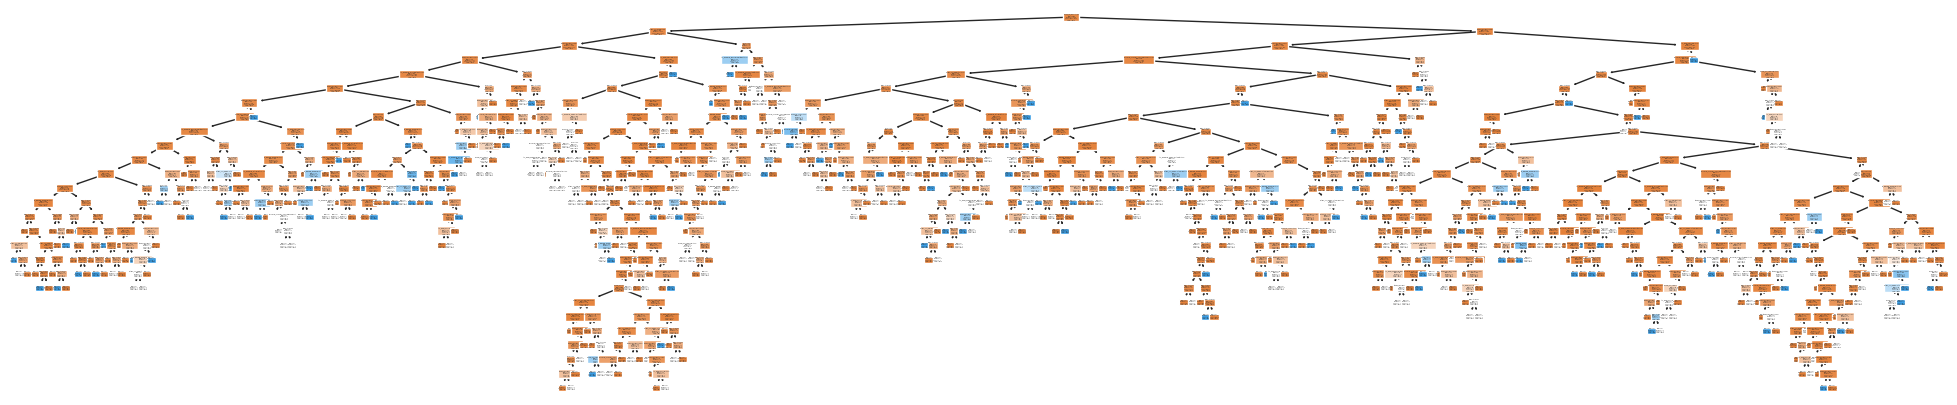

In [58]:
plt.figure(figsize=(25, 5))
plot_tree(clf_dt,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns);

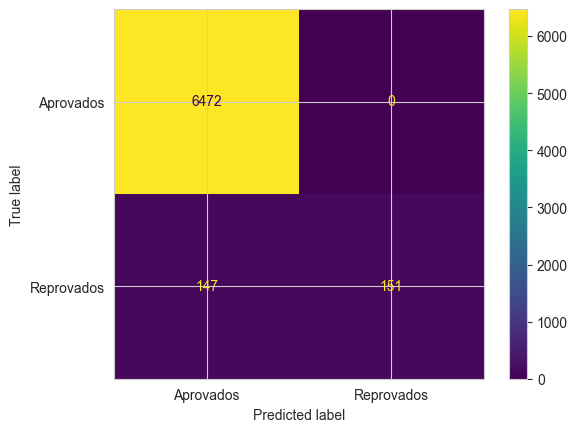

In [87]:
Y_pred = clf_dt.predict(X)
cm = confusion_matrix(Y, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()
plt.show()

In [64]:
accuracy_score(Y, y_pred) * 100

97.82865583456424

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [75]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,Y_train)

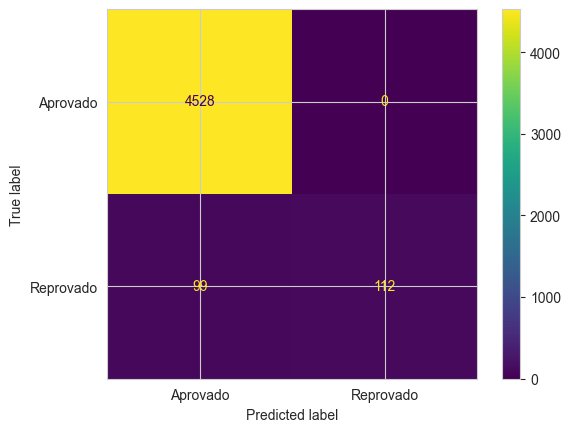

In [69]:
Y_pred = clf_dt.predict(X_train)
cm = confusion_matrix(Y_train, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()
plt.show()

In [70]:
accuracy_score(Y_train, Y_pred) * 100

97.9109516775691

In [77]:
clf = DecisionTreeClassifier(max_depth=10 , min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9537173806006893

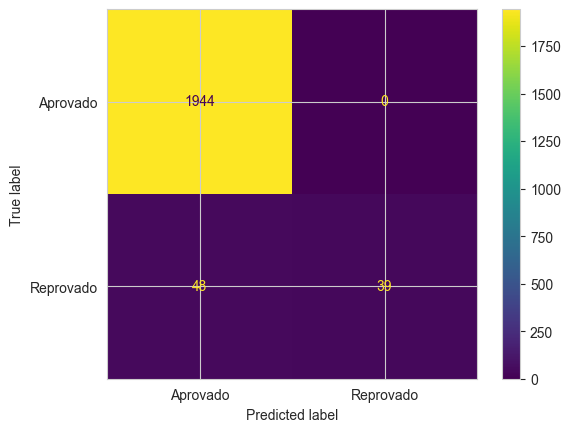

In [81]:
Y_pred = clf_dt.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()
plt.show()

In [85]:
1944 / 39

49.84615384615385

Aproximadamente 50 clientes aprovados para cada reprovado

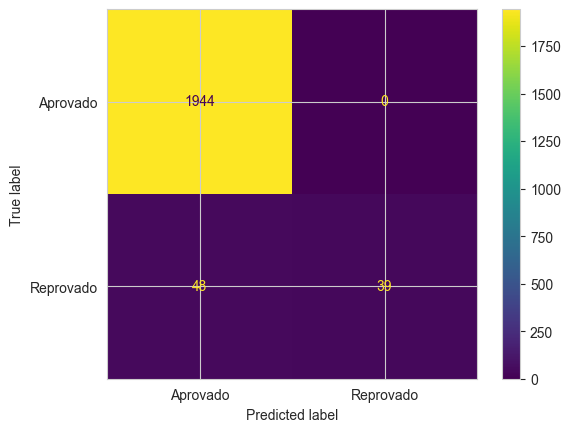

In [89]:
Y_pred = clf_dt.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()
plt.show()

Contando clientes erroneamente classificados:

In [90]:
(1944+48) / (1944+48+39)

0.9807976366322009

Alta acurácia